In [1]:
import pandas as pd
import networkx
import matplotlib.pyplot as plt
import numpy as np
import glob
from bokeh.io import output_notebook, show, save
from bokeh.io import output_notebook, show, save
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine, EdgesAndLinkedNodes, \
        NodesAndLinkedEdges, LabelSet
from bokeh.plotting import figure
from bokeh.palettes import Blues8, Reds8, Purples8, Oranges8, Viridis8, Spectral8
from bokeh.transform import linear_cmap
from networkx.algorithms import community
from bokeh.io import output_notebook, show, save
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine
from bokeh.plotting import figure
from bokeh.models.graphs import from_networkx
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
from numpy import sqrt
import glob
output_notebook()

Loading BokehJS ...

In [2]:
df = pd.read_csv('graph_def.csv')
df

,source,destination
0,CND,AIWCALARM
1,AI,AGA_US
2,ADD,AGA_US
3,PIT911B,ADD
4,AIWCALARM,AGA_US
...,...,...
61,AIWCALARM,AIWCALARM
62,PIT911B,AIWCALARM
63,LO_LIM,AIWCALARM
64,LO_LO_LIM,AIWCALARM


In [3]:
import networkx as nx
# G = nx.Graph()

In [5]:
path = './nodes/'
files = [f for f in glob.glob(path + "*.png")]
img = []
for f in files:
    img.append(mpimg.imread(f))
N = len(files)

In [27]:
G = nx.from_pandas_edgelist(df, 'source', 'destination')
pos=nx.spring_layout(G,k=10/sqrt(N))

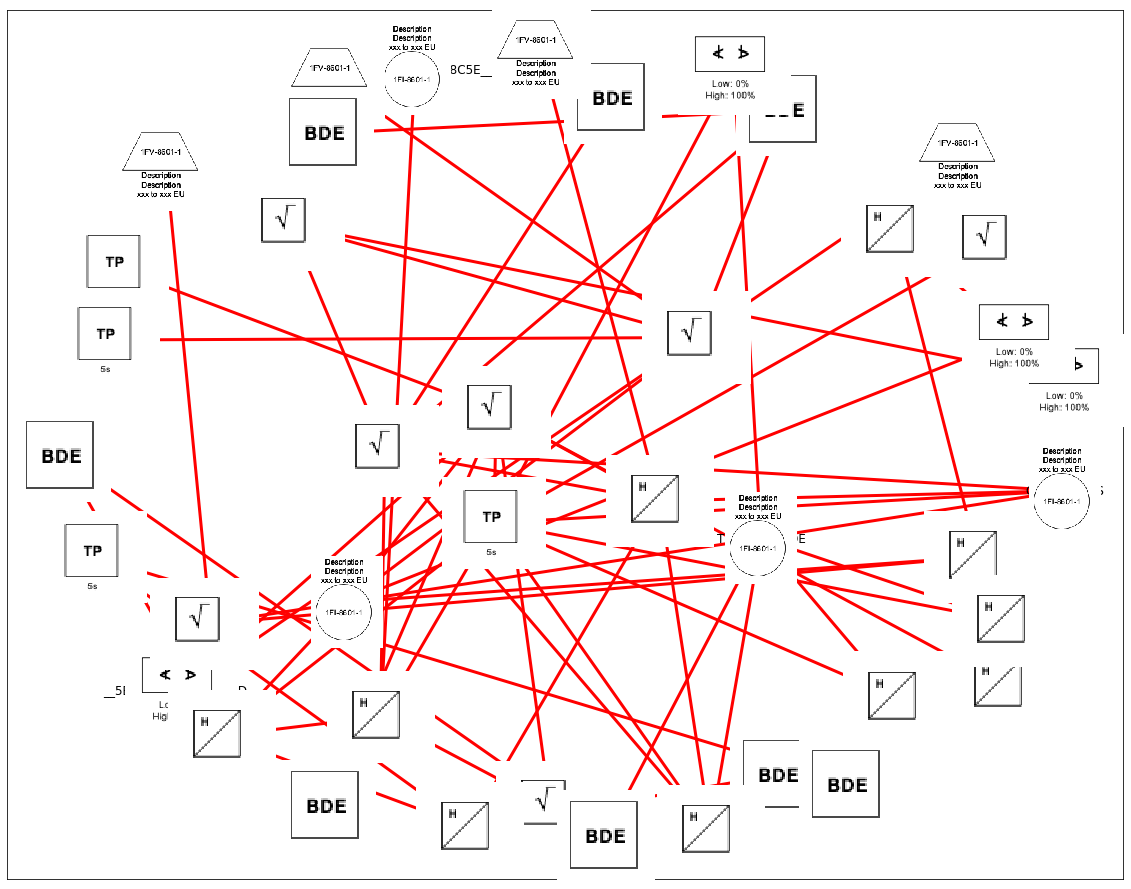

In [32]:
from matplotlib.pyplot import figure

figure(figsize=(20, 16))
nx.draw_networkx(G, pos, width=3, edge_color="r")

ax=plt.gca()
fig=plt.gcf()

trans = ax.transData.transform
trans2 = fig.transFigure.inverted().transform

imsize = 0.08 # this is the image size
i = 0
for n in G.nodes():
    (x,y) = pos[n]
    xx,yy = trans((x,y)) # figure coordinates
    xa,ya = trans2((xx,yy)) # axes coordinates
    a = plt.axes([xa-imsize/2.0,ya-imsize/2.0, imsize, imsize ])
    a.imshow(img[i])
    i+=1
    a.set_aspect('equal')
    a.axis('off')

plt.savefig('./save.png')